In [1]:
import rasterio
import numpy as np
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
# class CustomPCA:
#     def __init__(self, n_components):
#         self.n_components = n_components
#         self.mean = None
#         self.components = None

#     def fit_transform(self, X):
#         # Standardize the data
#         self.mean = np.mean(X) 
#         X_standardized = (X - self.mean) / np.std(X)

#         # Calculate covariance matrix
#         covariance_matrix = np.cov(X_standardized, rowvar=False)

#         # Calculate eigenvalues and eigenvectors
#         eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

#         # Sort eigenvalues and corresponding eigenvectors in descending order
#         indices = np.argsort(eigenvalues)[::-1]
#         eigenvalues = eigenvalues[indices]
#         eigenvectors = eigenvectors[:, indices]

#         # Select the top n_components eigenvectors
#         self.components = eigenvectors[:, :self.n_components]

#         # Project data onto the selected components
#         principal_components = np.dot(X_standardized, self.components)

#         return principal_components

#     def inverse_transform(self, principal_components):
#         # Reconstruct data from principal components
#         reconstructed_data = np.dot(principal_components, self.components.T) + self.mean
#         return reconstructed_data

# # Example usage



In [3]:
path = "./IMG_DATA/R20m"
import os

band_paths = []
for i in os.listdir(path=path):
    # for j in os.listdir(path=path + "/" + i):
    band_paths.append(path + "/" + i)


band_paths.sort()
band_paths = band_paths[1:-3]

for i in band_paths:
    print(i)

bands = []

for band_path in band_paths:
    with rasterio.open(band_path) as src:
        band = src.read(1)  # Assuming the bands are single-band
        bands.append(band)


./IMG_DATA/R20m/T43SBR_20231020T055849_B01_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B02_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B03_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B04_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B05_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B06_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B07_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B11_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B12_20m.jp2
./IMG_DATA/R20m/T43SBR_20231020T055849_B8A_20m.jp2


In [4]:
class plottingComp:
      
    def plot_components(self,xBands,bandLen,cmapCol):
        plt.clf()
        fig, axes = plt.subplots(1, bandLen, figsize=(15, 5))
        for i in range(bandLen):
            axes[i].imshow(xBands[i], cmap=cmapCol)
            axes[i].set_title(f'Band {i+1}')
    


In [5]:
def crop_image(matrix):
    x_i = 0
    y_i = 0

    for i in range(matrix.shape[0]):
        if matrix[0,i] == 0:
            y_i = i
            break
        
    for i in range(matrix.shape[1]):
        if matrix[i,0] == 0:
            x_i = i
            break

    return (x_i, y_i)

(10, 5490, 5490)

<Figure size 640x480 with 0 Axes>

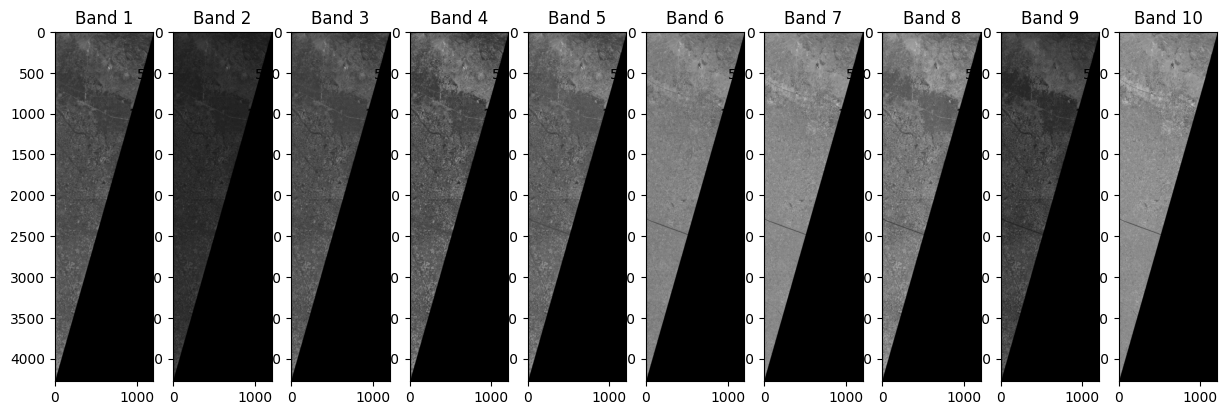

In [6]:
crop_x, crop_y = crop_image(bands[1])
cropped_bands = [band[:crop_x, :crop_y] for band in bands]



bandPlot = plottingComp()
bandPlot.plot_components(cropped_bands,len(cropped_bands),"grey")
# plt.clf()
# fig, axes = plt.subplots(1, len(cropped_bands), figsize=(15, 5))
# for i in range(len(cropped_bands)):
#     axes[i].imshow(cropped_bands[i], cmap="grey")
#     axes[i].set_title(f'Band {i+1}')



concatenated_image = np.stack(bands)
concatenated_image.shape

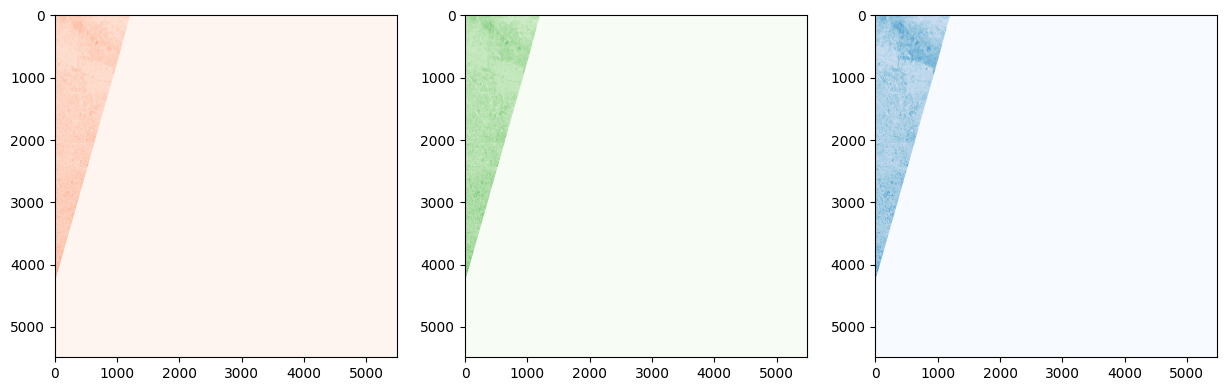

In [7]:
r = concatenated_image[1]
g = concatenated_image[2]
b = concatenated_image[3]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1).imshow(r, cmap="Reds")
plt.subplot(1, 3, 2).imshow(g, cmap="Greens")
plt.subplot(1, 3, 3).imshow(b, cmap="Blues")


plt.show()



In [8]:
# make into 5490 5490 10
X = concatenated_image
matrix_transposed = np.transpose(X, axes=(1, 2, 0))
matrix_transposed.shape






print(concatenated_image[0:3, :3, :3])


print()
print(matrix_transposed[0:3, :3, :3])




[[[   1  373  613]
  [ 367 1834 2174]
  [ 591 2153 2516]]

 [[2119 2012 1746]
  [1779 2008 1927]
  [1778 2196 1824]]

 [[2662 2439 2145]
  [2260 2474 2326]
  [2209 2673 2218]]]

[[[   1 2119 2662]
  [ 373 2012 2439]
  [ 613 1746 2145]]

 [[ 367 1779 2260]
  [1834 2008 2474]
  [2174 1927 2326]]

 [[ 591 1778 2209]
  [2153 2196 2673]
  [2516 1824 2218]]]


In [9]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit_transform(self, X):
        # Standardize the data
        mean = np.mean(X)
        X_standardized = (X - mean) / np.std(X)
        
        
        concat = np.concatenate(X_standardized)
        # Calculate covariance matrix
        covariance_matrix = np.cov(concat, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and corresponding eigenvectors in descending order
        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[:, indices]

        # Select the top n_components eigenvectors
        components = eigenvectors[:, :self.n_components]

        # Project data onto the selected components
        principal_components = np.dot(concat, components)

        # Store mean and components for later use
        self.mean = mean
        self.components = components

        return principal_components

    def inverse_transform(self, principal_components):
        # Reconstruct data from principal components
        reconstructed_data = np.dot(principal_components, self.components.T) + self.mean
        return reconstructed_data

In [ ]:

# n_components = 3
# X = matrix_transposed






# mean = np.mean(X) 
# X_standardized = (X - mean) / np.std(X)

# # Calculate covariance matrix
# concat = np.concatenate(X_standardized)
# print(X_standardized.shape)
# print(concat.shape)
# covariance_matrix = np.cov(concat, rowvar=False)
 
# # Calculate eigenvalues and eigenvectors
# eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
# print(eigenvectors.shape)

# # Sort eigenvalues and corresponding eigenvectors in descending order
# indices = np.argsort(eigenvalues)[::-1]
# eigenvalues = eigenvalues[indices]
# eigenvectors = eigenvectors[:, indices]
# print(eigenvectors.shape)

# # Select the top n_components eigenvectors
# components = eigenvectors[:, :n_components]

# # Project data onto the selected components
# principal_components = np.dot(concat, components)
# print(principal_components.shape)





In [10]:
no_Components = 3

custPCA = CustomPCA(n_components=no_Components)
principal_components = custPCA.fit_transform(matrix_transposed)


newp = np.reshape(principal_components, (5490, 5490, 3))
newp.shape

(5490, 5490, 3)

(3, 4279, 1207)


<Figure size 640x480 with 0 Axes>

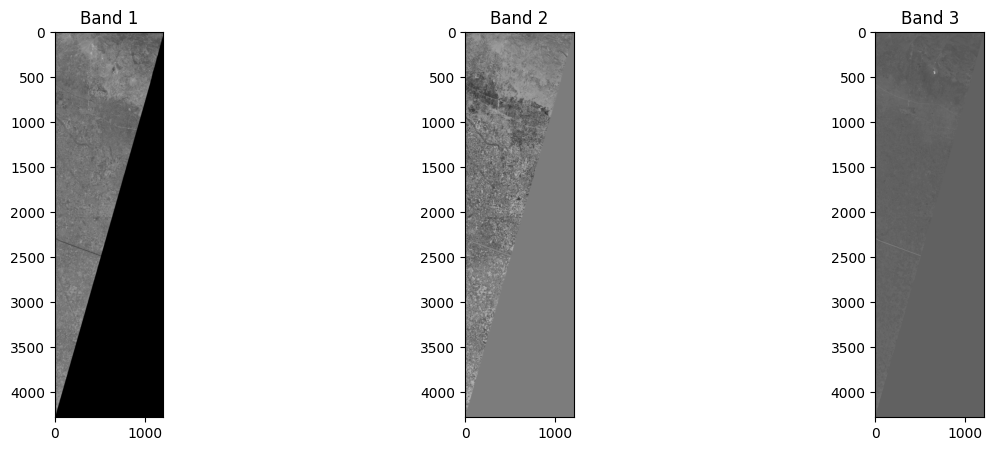

In [11]:
imgs = np.transpose(newp, axes=(2,0,1))
# crop_x, crop_y = crop_image(imgs[0])
# print(crop_x, crop_y)
cropped_imgs = np.asarray([img[:crop_x, :crop_y] for img in imgs])

print(cropped_imgs.shape)

bandPlot.plot_components(cropped_imgs,no_Components,"grey")

# plt.clf()
# fig, axes = plt.subplots(3, figsize=(15, 15))
# for i in range(no_Components):
#     axes[i].imshow(cropped_imgs[i], cmap="grey")

In [12]:
#inverse reconstructed


reconstructed_data = custPCA.inverse_transform(principal_components)
# reconstructed_data = np.dot(principal_components, components.T) + mean

reconstructed_data.shape






(30140100, 10)

In [13]:
reconst = np.reshape(reconstructed_data, (5490, 5490, 10))
reconst = np.transpose(reconst, axes=(2,0,1))

reconst.shape
print(len(reconst))


10


<Figure size 640x480 with 0 Axes>

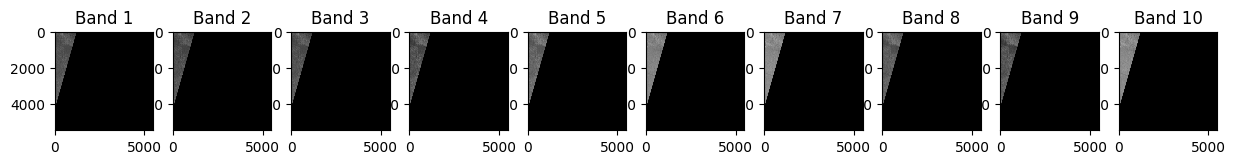

In [14]:

bandPlot.plot_components(reconst,len(reconst),"grey")

In [ ]:
# comps = []


# # Assuming concatenated_image is a list of images
# for idx, i in enumerate(concatenated_image):
#     pca = CustomPCA(n_components=100)
#     principalComponents = pca.fit_transform(i)
#     comps.append(principalComponents)

#     # Reconstruct the data in the original space
#     X_reconstructed = pca.inverse_transform(principalComponents)



#     # Calculate Variance Retained
#     # variance_retained = np.sum(pca.explained_variance_) / np.sum(pca.explained_variance_ratio_)
#     # print(f"Variance Retained for image {idx + 1}:", variance_retained)





In [ ]:
# from sklearn.decomposition import PCA

# # Assuming concatenated_image is a list of images
# for idx, i in enumerate(concatenated_image):
#     pca = PCA(n_components=100)
#     principalComponents = pca.fit_transform(i)

#     # Reconstruct the data in the original space
#     X_reconstructed = pca.inverse_transform(principalComponents)

#     # Calculate Mean Squared Error (MSE)
#     mse = np.sum((i - X_reconstructed) ** 2) / i.size  # Divide by the total number of elements for normalization
#     print(f"MSE for image {idx + 1}:", mse)



#     # Calculate Explained Variance
#     explained_variance = np.sum(pca.explained_variance_ratio_)
#     print(f"Explained Variance for image {idx + 1}:", explained_variance)

#     # Calculate Information Loss
#     information_loss = 1 - explained_variance
#     print(f"Information Loss for image {idx + 1}:", information_loss)

In [ ]:
# X_reconstructed = pca.inverse_transform(principalComponents)

# # Calculate Reconstruction Error
# reconstruction_error = np.sum((principalComponents - X_reconstructed) ** 2)
# print("Reconstruction Error:", reconstruction_error)

# # Calculate Variance Retained
# variance_retained = np.sum(pca.explained_variance_) / np.sum(pca.explained_variance_ratio_)
# print("Variance Retained:", variance_retained)

In [ ]:
# from sklearn.decomposition import PCA

# # Assuming concatenated_image is a list of images
# for idx, i in enumerate(concatenated_image):
#     pca = PCA(n_components=100)
#     principalComponents = pca.fit_transform(i)

#     # Reconstruct the data in the original space
#     X_reconstructed = pca.inverse_transform(principalComponents)

#     # Calculate Reconstruction Error
#     reconstruction_error = np.sum((i - X_reconstructed) ** 2) / i.size  # Divide by the total number of elements for normalization
#     print(f"Reconstruction Error for image {idx + 1}:", reconstruction_error)

#     # Calculate Variance Retained
#     # variance_retained = np.sum(pca.explained_variance_) / np.sum(pca.explained_variance_ratio_)
#     # print(f"Variance Retained for image {idx + 1}:", variance_retained)


In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Assume X is your data
# # Vary the number of principal components
# num_components_list = range(1, 50)

# reconstruction_errors = []
# explained_variances = []
# X_reconstructed = []
# for num_components in num_components_list:
#     pca = PCA(n_components=num_components)

#     for i in concatenated_image:
#         X_pca = pca.fit_transform(i)
#         X_reconstructed = pca.inverse_transform(X_pca)

#         # Calculate reconstruction error
#         reconstruction_error = np.sum((i - X_reconstructed) ** 2) / np.prod(i.shape)
#         reconstruction_errors.append(reconstruction_error)
        
#         # Calculate explained variance ratio
#         explained_variance = np.sum(pca.explained_variance_ratio_)
#         explained_variances.append(explained_variance)

# # Plot the results


In [ ]:

# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(num_components_list, reconstruction_errors, marker='o')
# plt.title('Reconstruction Error vs. Number of Components')
# plt.xlabel('Number of Components')
# plt.ylabel('Reconstruction Error')

# plt.subplot(1, 2, 2)
# plt.plot(num_components_list, explained_variances, marker='o')
# plt.title('Explained Variance vs. Number of Components')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')

# plt.tight_layout()
# plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Assuming concatenated_image is a list of images
# # You can modify the range of n_components as needed
# num_components_to_test = 25
# explained_variances = []

# for num_components in range(1, num_components_to_test + 1):
#     pca = PCA(n_components=num_components)
#     for i in concatenated_image:
#         principal_components = pca.fit_transform(i)
#         explained_variance = np.sum(pca.explained_variance_ratio_)
#         explained_variances.append(explained_variance)

# # Create Scree Plot
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, num_components_to_test + 1), explained_variances, marker='o')
# plt.title('Scree Plot')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Explained Variance')
# plt.grid(True)
# plt.show()

# # Create Cumulative Explained Variance Plot
# cumulative_explained_variances = np.cumsum(explained_variances)

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, num_components_to_test + 1), cumulative_explained_variances, marker='o', linestyle='--')
# plt.title('Cumulative Explained Variance Plot')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()
